In [ ]:
import pandas as pd

# Läs in data
df = pd.read_excel("hr_employee_data.xlsx")

# överblick

print(df.shape) # antal rader och kolumner
print(df.info()) # information om datatyper och icke-null värden
print(df.head()) # de första raderna i datan


(14999, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB
None
     Emp_Id  satisfaction_level  last_evaluation  number_project  \
0  IND02438                0.38             0.53               2   


In [ ]:
df.describe() # statistisk sammanfattning av numeriska kolumner
df.describe(include="object") # statistisk sammanfattning av kategoriska kolumner

,Emp_Id,Department,salary
count,14999,14999,14999
unique,14999,10,3
top,IND02438,sales,low
freq,1,4140,7316


In [11]:
df.isnull().sum() # antal saknade värden per kolumn

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [13]:
for col in df.select_dtypes(include=["object"]).columns:
    print(col, df[col].unique()[:10]) # unika värden i kategoriska kolumner

Emp_Id ['IND02438' 'IND28133' 'IND07164' 'IND30478' 'IND24003' 'IND08609'
 'IND14345' 'IND16300' 'IND27336' 'IND41409']
Department ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary ['low' 'medium' 'high']


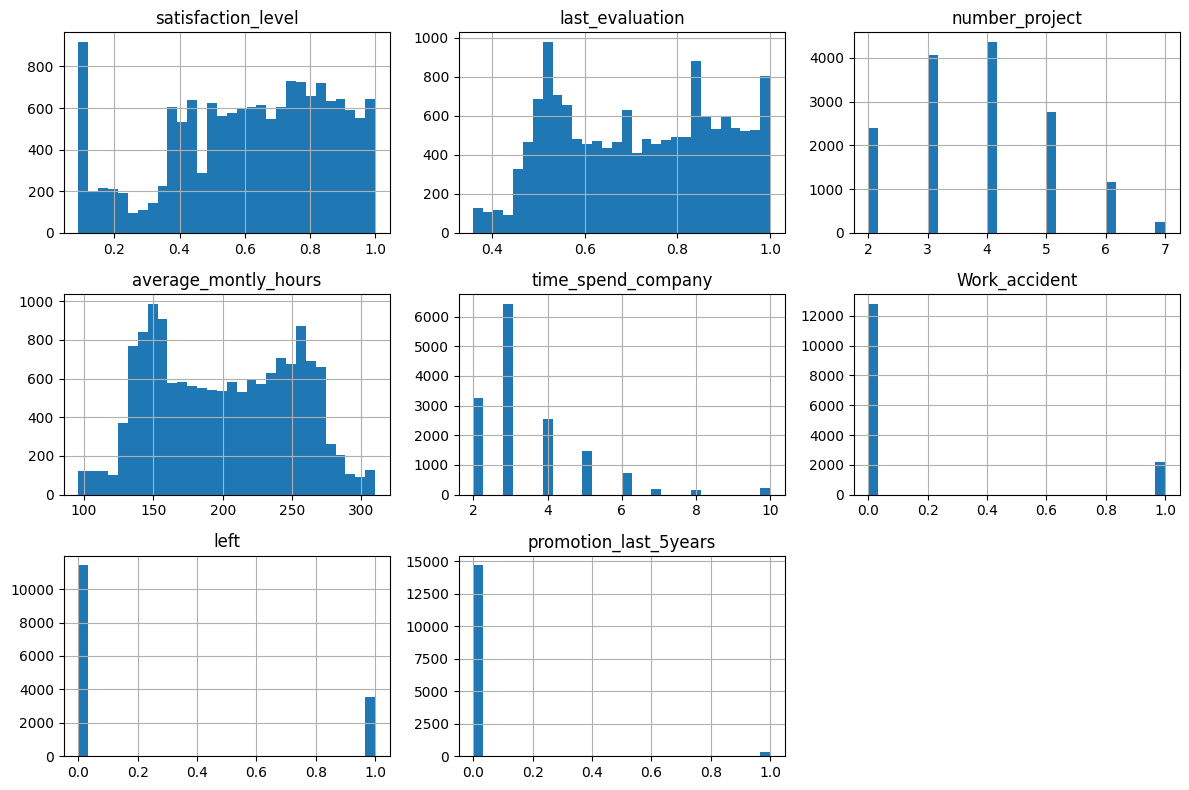

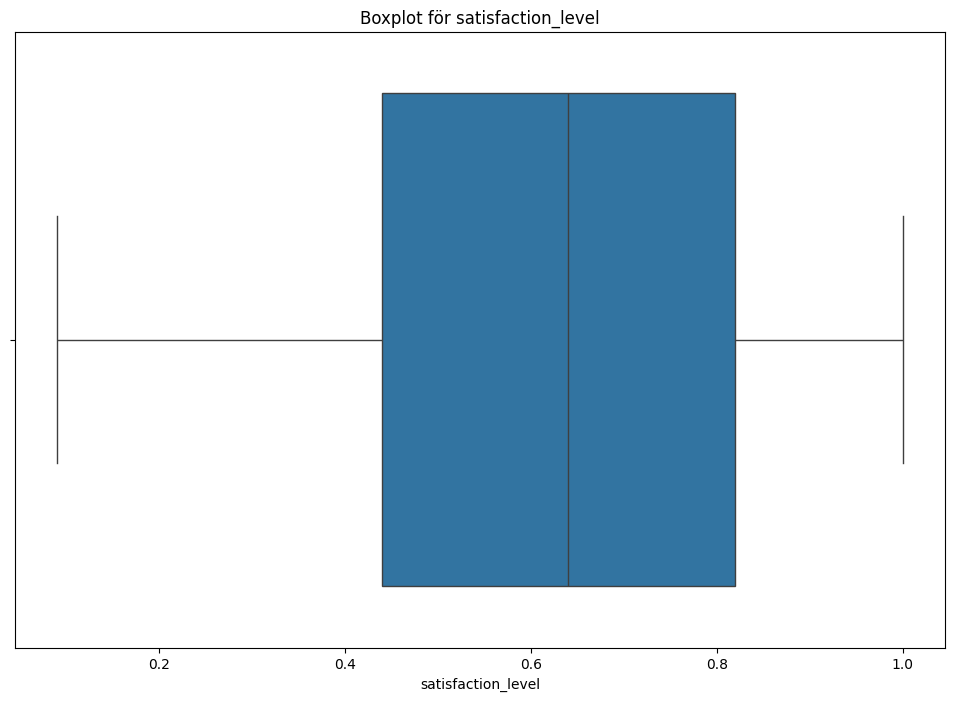

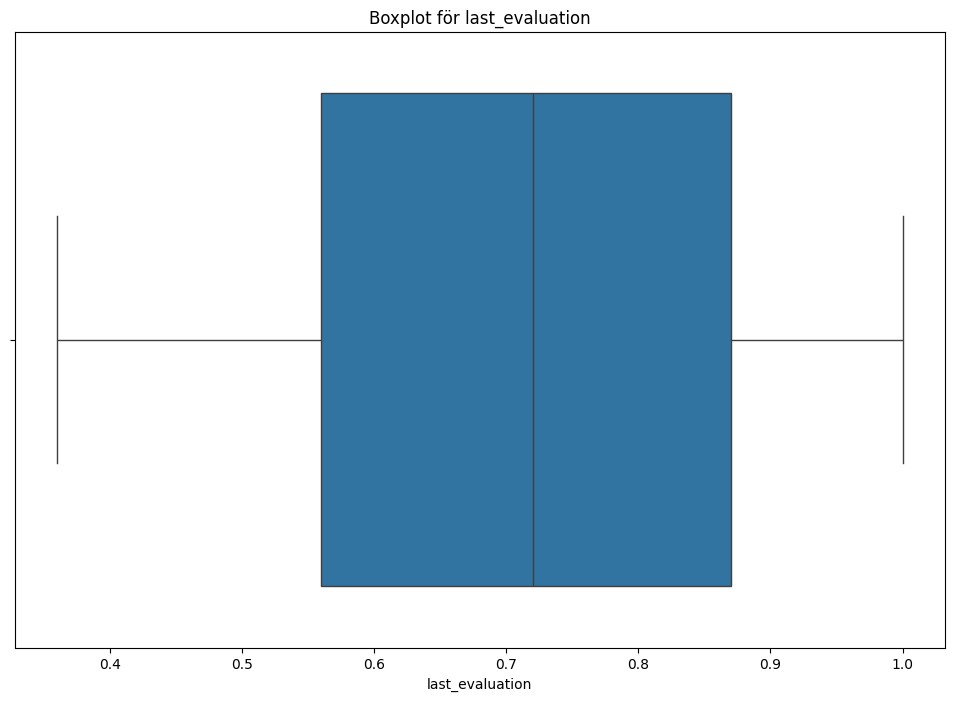

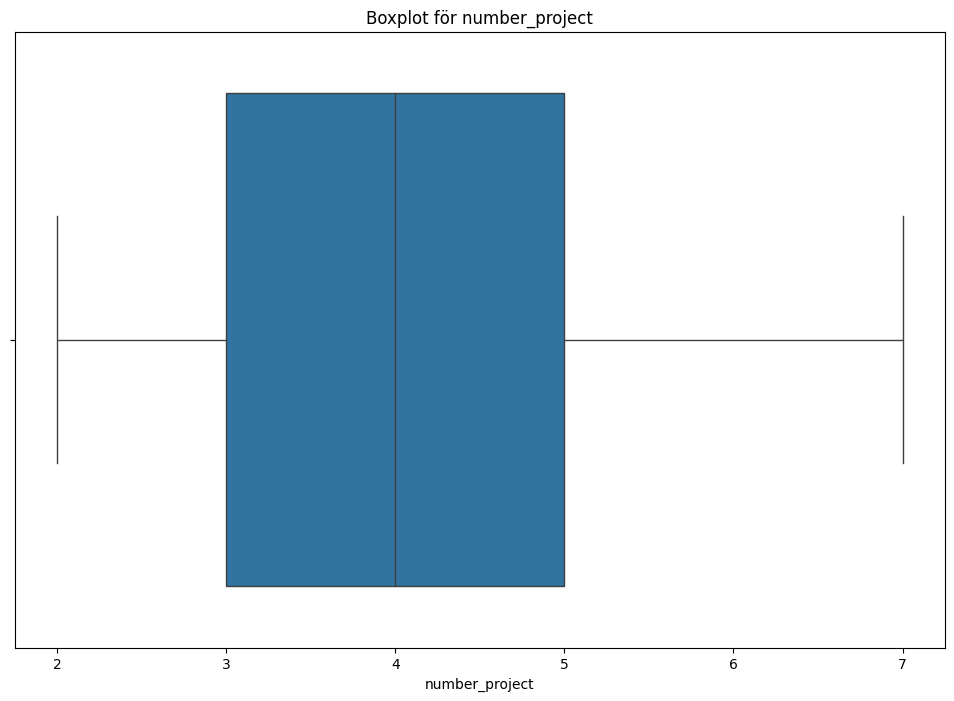

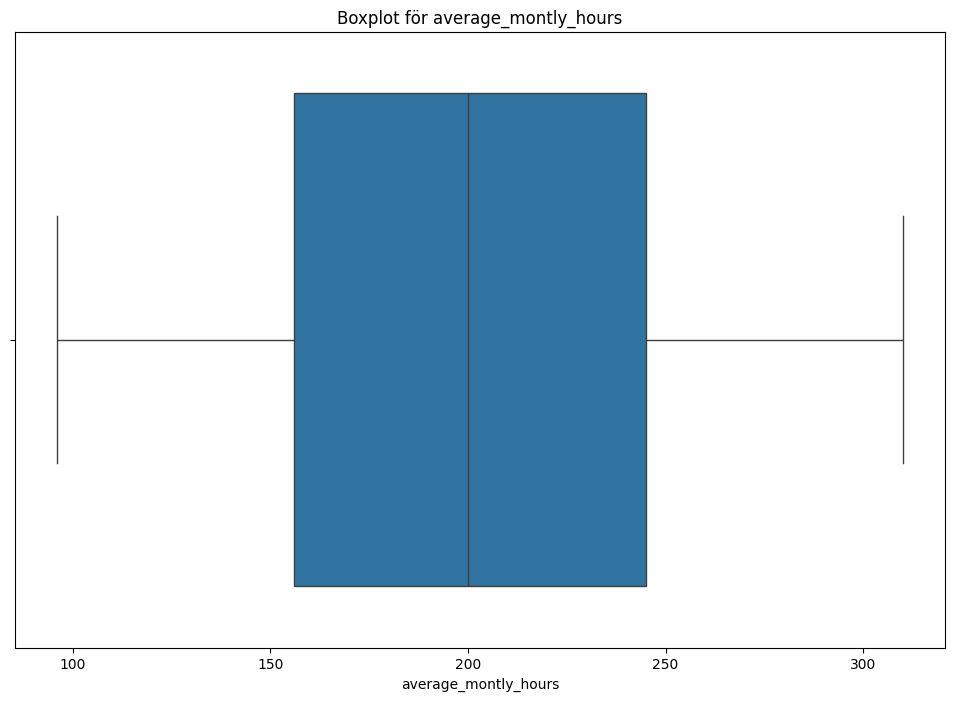

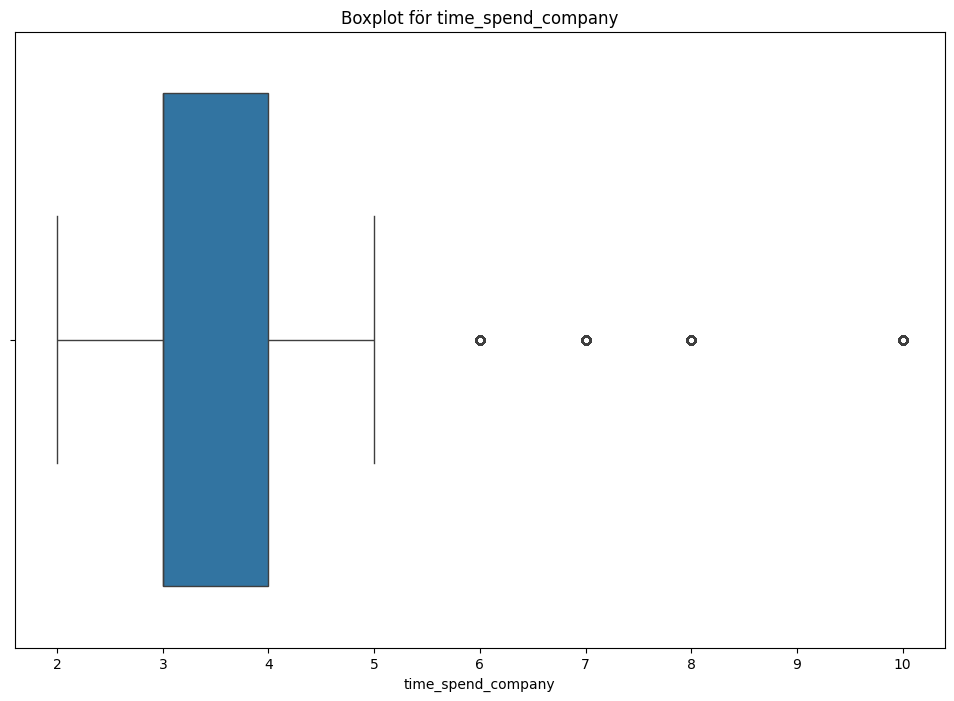

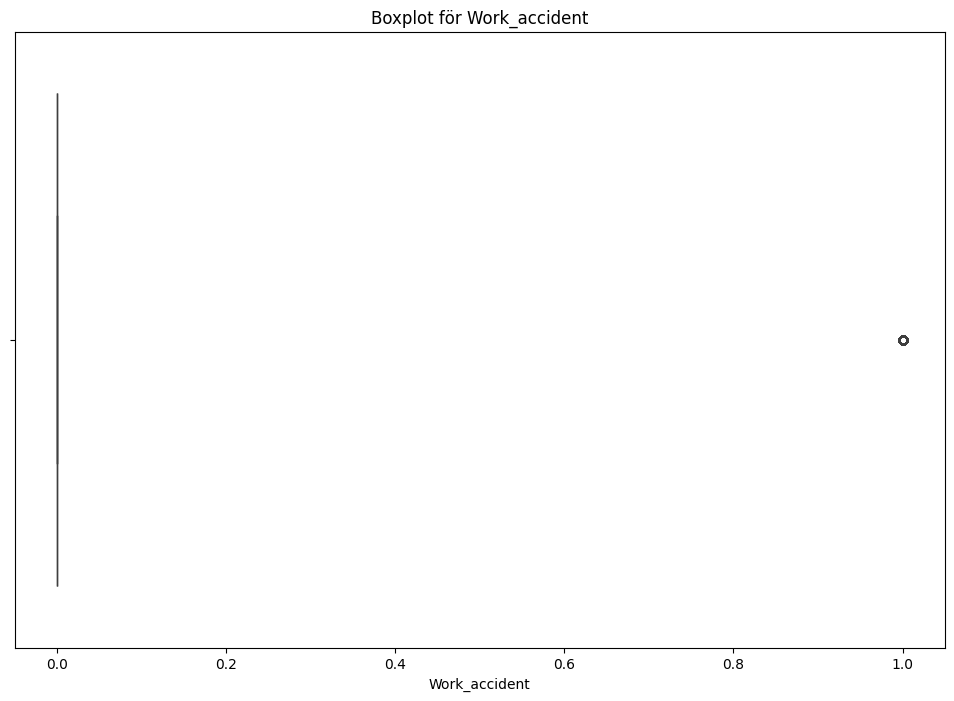

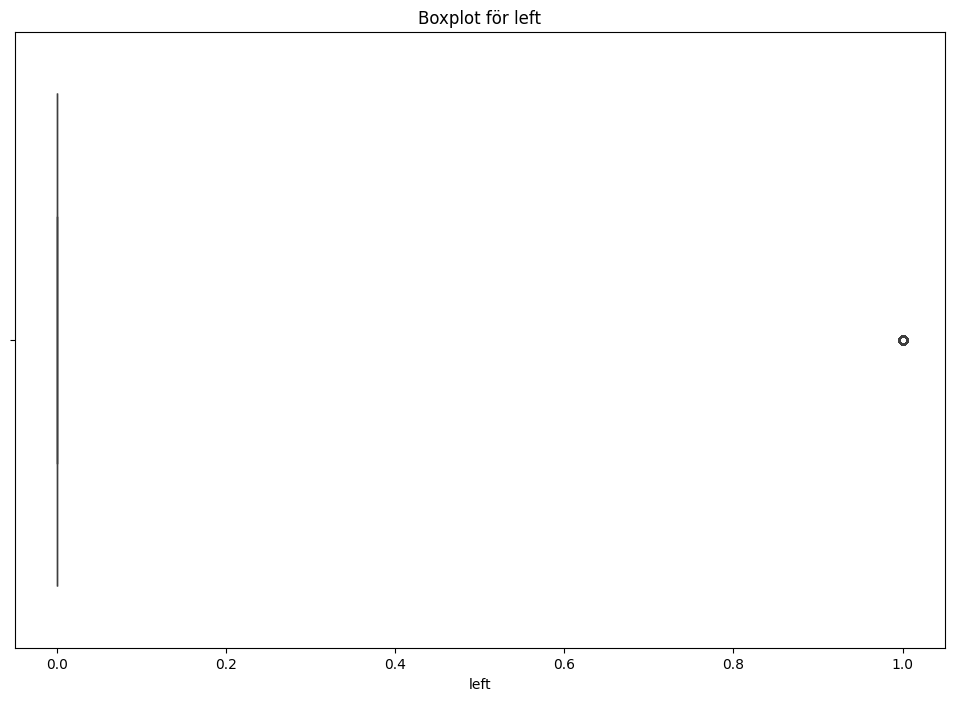

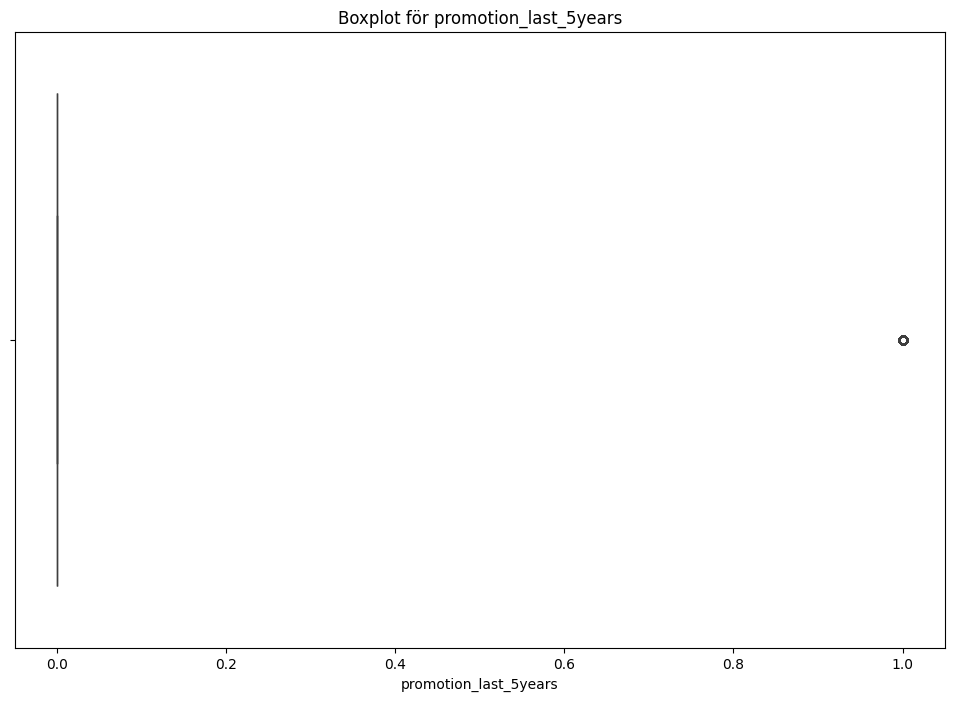

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram för numeriska features
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplot för att hitta outliers
for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot för {col}")
    plt.show()

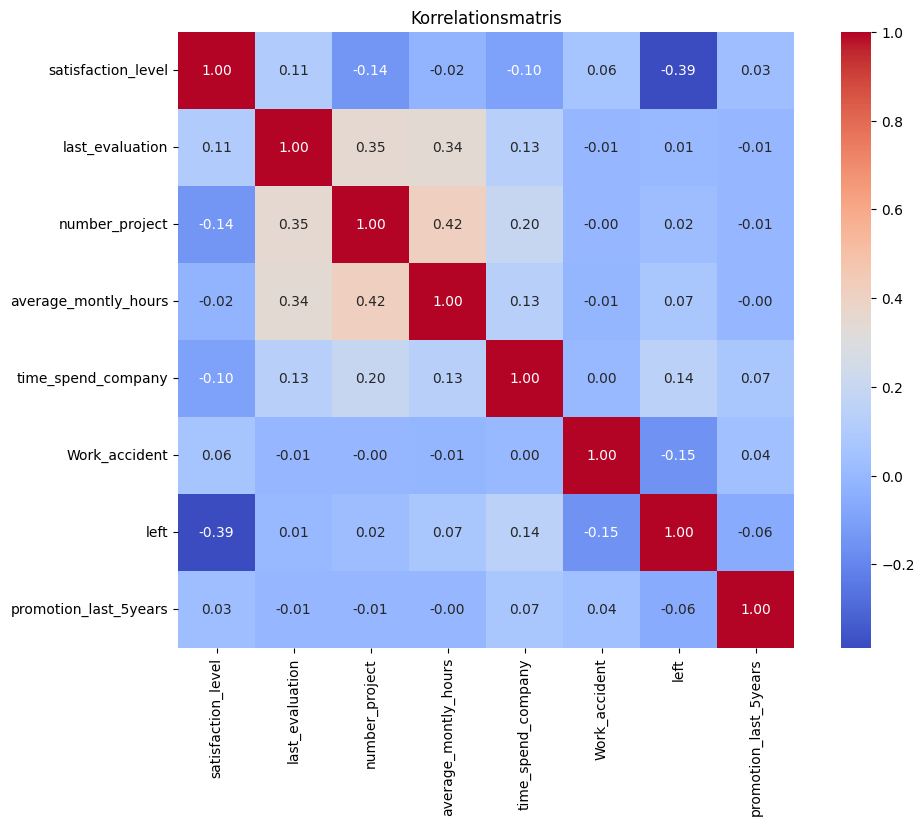

In [ ]:
# Korrelationsanalys

corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korrelationsmatris")
plt.show()

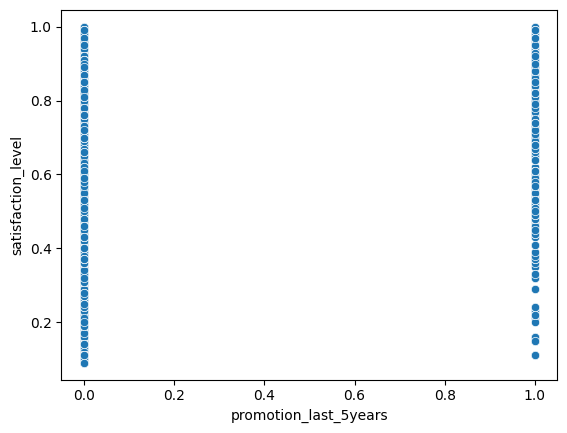

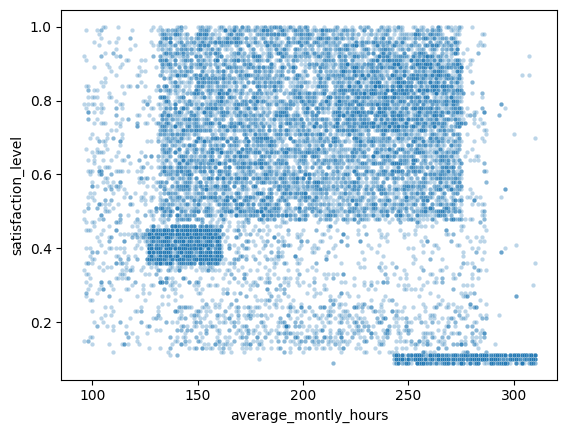

In [20]:
# Samband mellan variabler
sns.scatterplot(x="promotion_last_5years", y="satisfaction_level", data=df)
plt.show()

sns.scatterplot(
    x="average_montly_hours", 
    y="satisfaction_level", 
    data=df,
    alpha=0.3,
    s=10 
)

plt.show()

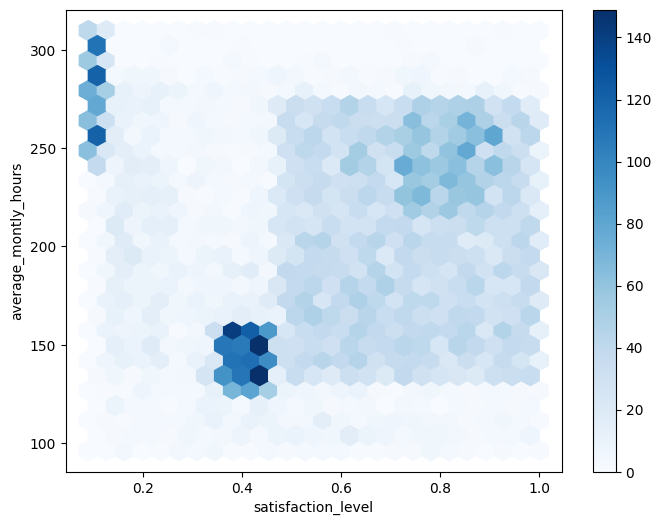

In [21]:
df.plot.hexbin(
    x="satisfaction_level",
    y="average_montly_hours",
    gridsize=25,
    cmap="Blues",
    figsize=(8,6)
)

plt.show()


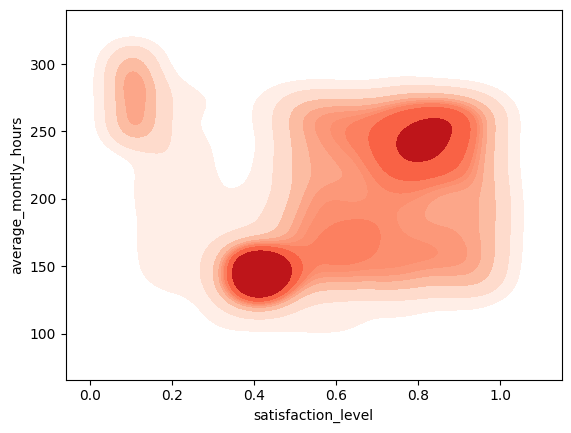

In [22]:
sns.kdeplot(
    x="satisfaction_level",
    y="average_montly_hours",
    data=df,
    fill=True,
    cmap="Reds",
    thresh=0.05
)

plt.show()


In [23]:
# Kolla skillnader i medelvärde mellan de som lämnat (1) och stannat (0)
df.groupby("left").mean(numeric_only=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Analys och rekommendationer

Efter att ha analyserat HR-data om medarbetare kan vi dra följande slutsatser:

### Nyckelinsikter
- **Nöjdhet (satisfaction_level)**: De som lämnar företaget har generellt mycket lägre nöjdhet. Det är en av de starkaste indikatorerna på personalomsättning.  
- **Arbetstimmar (average_monthly_hours)**: Både väldigt låga och väldigt höga timmar hänger ihop med högre risk att lämna.  
- **Antal projekt (number_project)**: Medarbetare med många parallella projekt tenderar att lämna i större utsträckning, vilket kan tyda på stress.  
- **Tid i företaget (time_spend_company)**: Många som lämnar gör det efter 4–5 år, vilket verkar vara en kritisk punkt.  
- **Befordran (promotion_last_5years)**: De som fått befordran tenderar att stanna kvar i högre grad. Möjligheter till karriärutveckling är alltså viktiga.  
- **Arbetsolyckor (Work_accident)**: Vi ser ingen tydlig koppling mellan olyckor och personalomsättning.

### Rekommendationer
1. **Mät och stärk medarbetarnöjdheten**: Tidig identifiering av låg nöjdhet kan förebygga avgångar.  
2. **Hantera arbetsbelastning**: Undvik att anställda får för många projekt eller orimligt långa arbetsveckor.  
3. **Karriärmöjligheter**: Skapa tydligare karriärvägar och befordringsmöjligheter för att behålla talanger.  
4. **Kritiska år (4–5 år)**: Inför strukturerade utvecklingssamtal kring den tidpunkten för att öka retention.  

---

 *Sammanfattning:*  
Datan visar att personalomsättning i hög grad drivs av medarbetarnas nöjdhet, arbetsbelastning och utvecklingsmöjligheter. Genom att adressera dessa områden kan vi minska risken för att nyckelkompetens lämnar företaget.
